# The Sparks Foundation- Data Science and Bussiness Analytics
    
 # Done By - Sanskriti Jain

# Task 6:Predict using Decision Tree (Intermediate Level) 

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix,accuracy_score
from sklearn.tree import plot_tree

## Load data

In [2]:
df= pd.read_csv("iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Data Analysis

In [4]:
df.shape

(150, 6)

In [5]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [8]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## EDA

Removing redundant column 'Id'

In [10]:
df=df.drop(['Id'],axis=1)

<AxesSubplot:xlabel='Species', ylabel='count'>

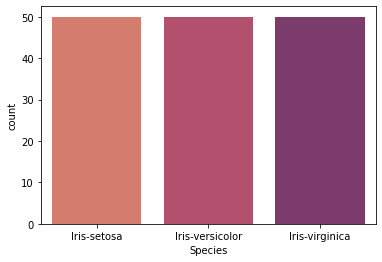

In [11]:
sns.countplot(data=df, x='Species', palette='flare')

The count for each species is same

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

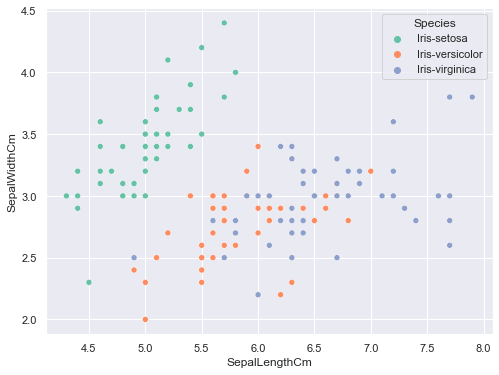

In [12]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm',hue='Species', palette="Set2")

The Maximum Sepal Width is of Iris Setosa-species
The Maximum Sepal Length is of Iris-viriginica species
There is a linear relationship between SepalWIdthCM and SepalLengthCm in Iris-Setosa species

In [13]:
le=LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])

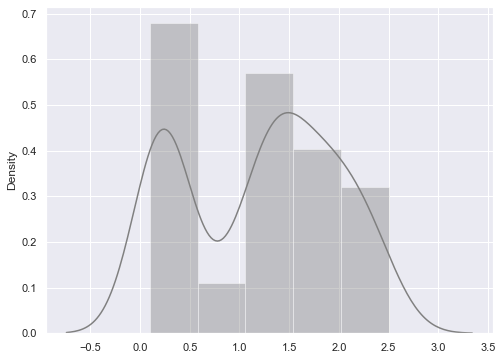

In [14]:
sns.distplot(x=df["PetalWidthCm"], kde=True, color='grey');

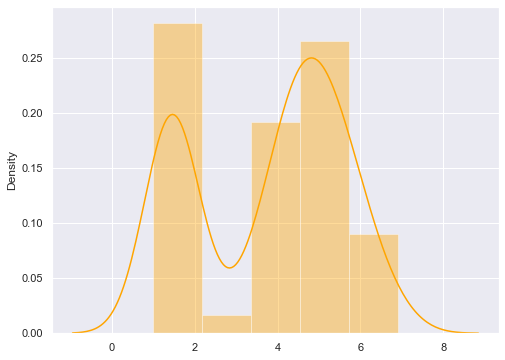

In [15]:
sns.distplot(x=df["PetalLengthCm"], kde=True, color='orange');

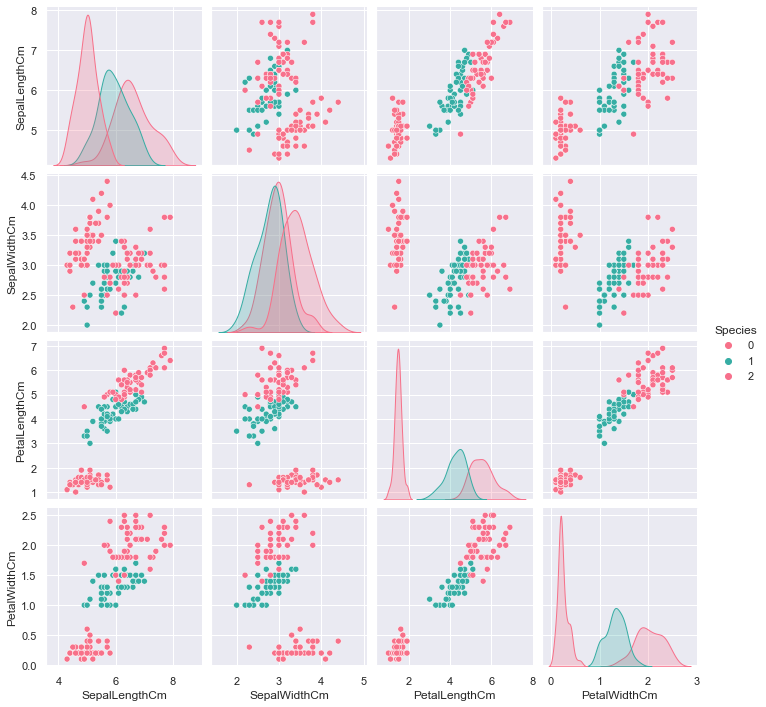

In [16]:
sns.pairplot(df, hue='Species',palette="husl");

### Extracting the dependent and independent features

In [17]:
X=df.drop(['Species'], axis=1)

In [18]:
y=df['Species']

<AxesSubplot:>

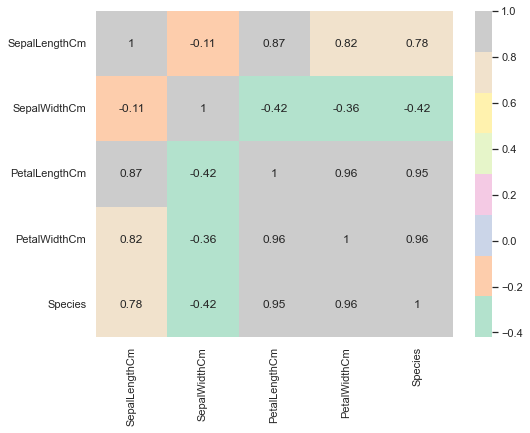

In [19]:
sns.heatmap(df.corr(), annot=True, cmap="Pastel2")

From the above heatmap: The output column "Species" is highly correlated with (i)PetalWIdthCm, (ii)PetalLengthCm, (iii)SepalWidthCm

## Splitting data int training and testing

In [20]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Model training and predictions

In [21]:
model=DecisionTreeClassifier()

In [22]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
base_pred=model.predict(X_test)

## FInding the accuracy

In [24]:
print("Accuracy of model: ", accuracy_score(y_test,base_pred))

Accuracy of model:  0.9555555555555556


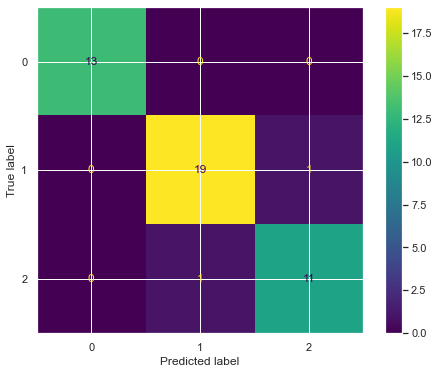

In [25]:
plot_confusion_matrix(model, X_test, y_test);

In [26]:
print(classification_report(y_test, base_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.95      0.95        20
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



Based on precision, recall and f1-score: The category 0 have better segration features while 1 and 2 have good but not as 1. 

## Plotting decision Tree

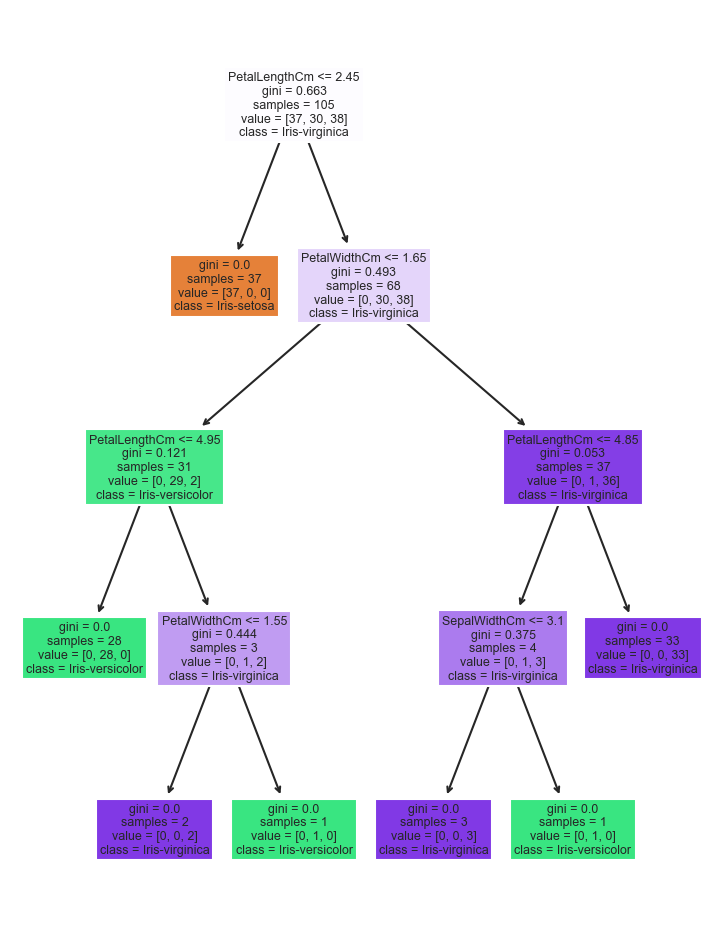

In [27]:
plt.figure(figsize=(6,8), dpi=150)
plot_tree(model, filled= True, feature_names=X.columns, class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']);

## HyperParameter tunning

In [28]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4], 'max_depth':[4,5,6,7]}

In [29]:
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=101), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 1176 candidates, totalling 3528 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=101),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [30]:
grid_search_cv.best_params_

{'max_depth': 4, 'max_leaf_nodes': 4, 'min_samples_split': 2}

In [31]:
grid_search_cv.best_score_

0.9619047619047619

## Building tree using the best params

In [32]:
model=DecisionTreeClassifier(max_depth= 4, max_leaf_nodes= 4, min_samples_split= 2)

In [33]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=4)

In [34]:
pred=model.predict(X_test)

In [35]:
print("Accuracy of model: ", accuracy_score(y_test,pred))

Accuracy of model:  0.9777777777777777


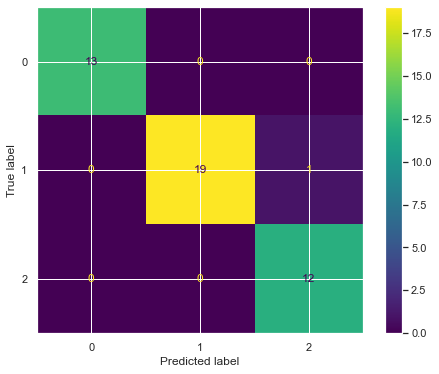

In [36]:
plot_confusion_matrix(model, X_test, y_test);

In [37]:
print(classification_report(y_test, base_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.95      0.95        20
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



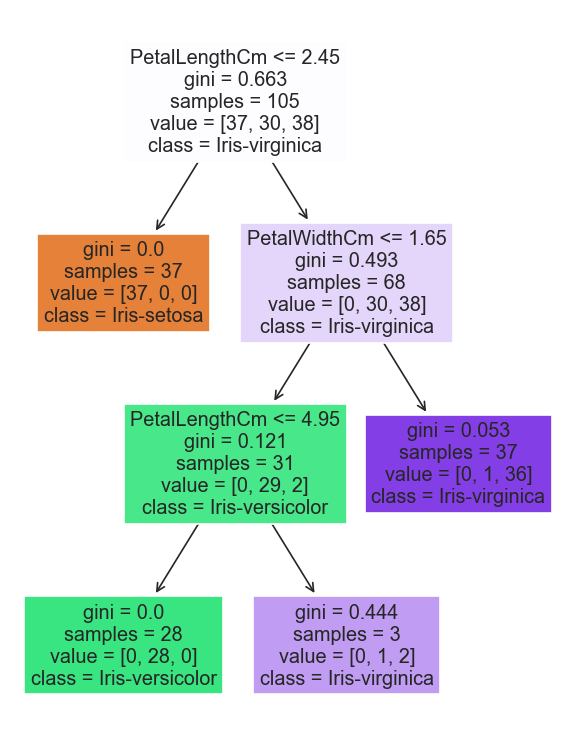

In [38]:
plt.figure(figsize=(6,8), dpi=120)
plot_tree(model, filled= True, feature_names=X.columns, class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']);